# Assignment 4
### Analysis on stock prediction pricimg based on stocks finance data. Models used will be RNN of Deep learning ML models and tuning the hyperparamreters

Assessment is based on a summary report, comprising:

* Introduction and problem background, including comparison and selection of
  competing approaches
* Description of the method you have developed and key design choices made
  Experimental analysis and testing of your method
* Evidence of correct implementation of method
* Reflection on experimental results and future improvements

In [137]:
#importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [138]:
df = pd.read_csv('GOOG.csv', date_parser = True)
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [139]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


In [140]:
data_training = df[df['date']<'2021-01-01'].copy()
data_test = df[df['date']>='2021-01-01'].copy()

In [141]:
data_training.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1142,GOOG,2020-12-24 00:00:00+00:00,1738.85,1746.0000,1729.110,1735.000,346753,1738.85,1746.0000,1729.110,1735.000,346753,0.0,1.0
1143,GOOG,2020-12-28 00:00:00+00:00,1776.09,1790.7276,1746.335,1751.635,1390962,1776.09,1790.7276,1746.335,1751.635,1390962,0.0,1.0
1144,GOOG,2020-12-29 00:00:00+00:00,1758.72,1792.4400,1756.090,1787.790,1299395,1758.72,1792.4400,1756.090,1787.790,1299395,0.0,1.0
1145,GOOG,2020-12-30 00:00:00+00:00,1739.52,1765.0950,1725.600,1762.010,1306130,1739.52,1765.0950,1725.600,1762.010,1306130,0.0,1.0
1146,GOOG,2020-12-31 00:00:00+00:00,1751.88,1758.9300,1735.420,1735.420,1012240,1751.88,1758.9300,1735.420,1735.420,1012240,0.0,1.0


In [142]:
df = df.drop(['symbol'],axis=1)
df['date']= df['date'].str.split(" ", n = 1, expand = True)[0]
df['date']= pd.to_datetime(df['date'])
df1 = df.set_index('date').resample('m').first()
df1

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-30,718.27,722.4700,713.1200,716.48,1306065,718.27,722.4700,713.1200,716.48,1306065,0.0,1.0
2016-07-31,699.21,700.6500,692.1301,692.20,1344710,699.21,700.6500,692.1301,692.20,1344710,0.0,1.0
2016-08-31,772.88,780.4300,761.0900,761.09,2700470,772.88,780.4300,761.0900,761.09,2700470,0.0,1.0
2016-09-30,768.78,771.0200,764.3000,769.25,925131,768.78,771.0200,764.3000,769.25,925131,0.0,1.0
2016-10-31,772.56,776.0650,769.5000,774.25,1278821,772.56,776.0650,769.5000,774.25,1278821,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-28,1901.35,1922.3918,1850.9300,1853.57,1602182,1901.35,1922.3918,1850.9300,1853.57,1602182,0.0,1.0
2021-03-31,2081.51,2086.5200,2046.1000,2056.52,1405115,2081.51,2086.5200,2046.1000,2056.52,1405115,0.0,1.0
2021-04-30,2137.75,2142.9400,2096.8900,2097.95,1698978,2137.75,2142.9400,2096.8900,2097.95,1698978,0.0,1.0


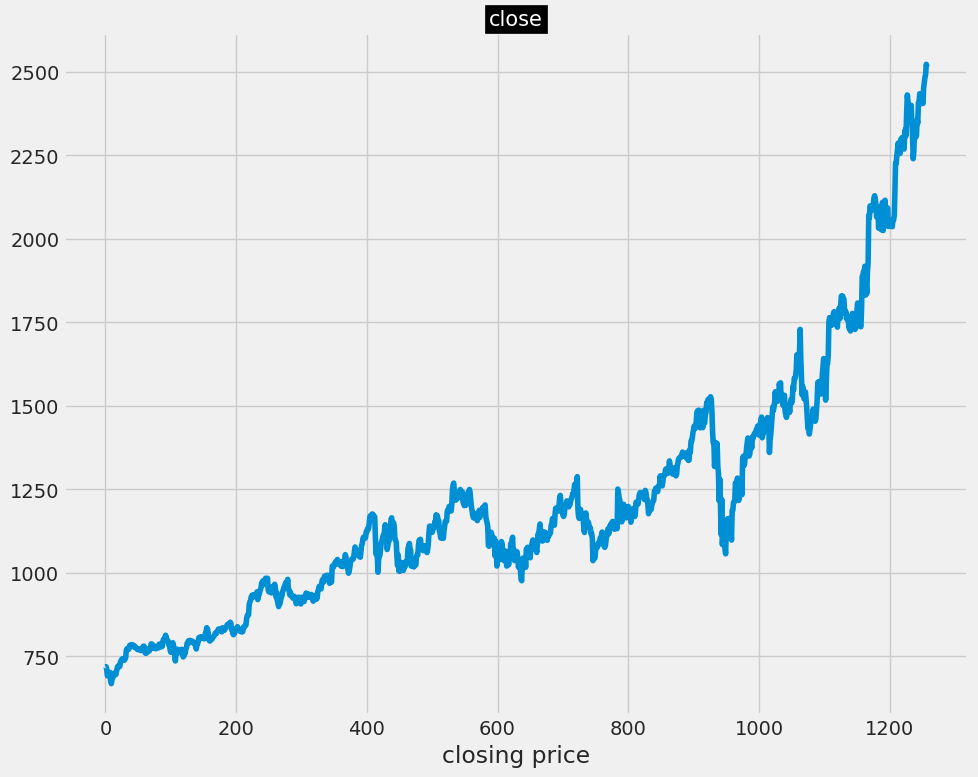

In [143]:
plt.figure(figsize = (10,8))
plt.plot(df.index.values,df['close'])
plt.title('close',backgroundcolor='black',color='white',fontsize=15)
plt.xlabel('closing price')
plt.tight_layout()
plt.show()

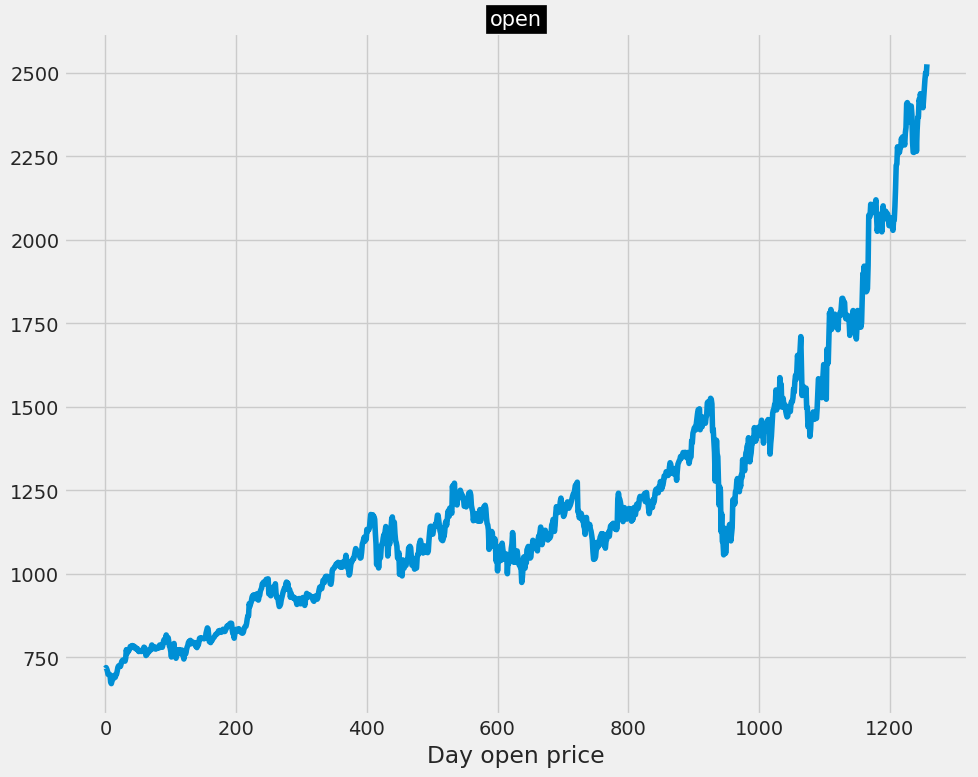

In [144]:
plt.figure(figsize = (10,8))
plt.plot(df.index.values,df['open'])
plt.title('open',backgroundcolor='black',color='white',fontsize=15)
plt.xlabel('Day open price')
plt.tight_layout()
plt.show()

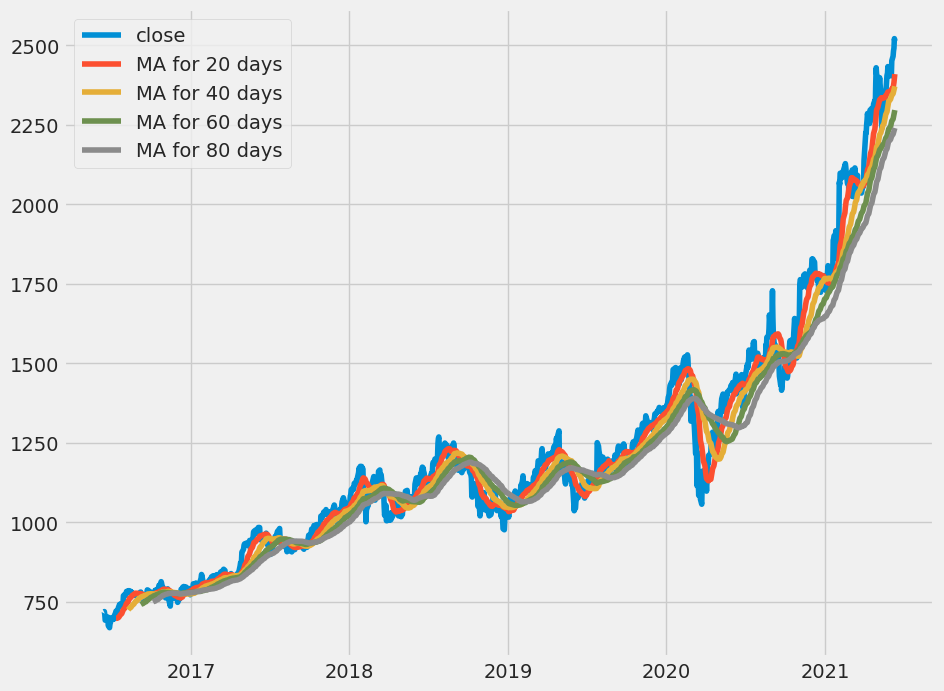

In [145]:
ma_day = [20, 40, 60, 80]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['close'].rolling(ma).mean()

plt.figure(figsize=(10,8))

plt.plot(df['date'],df['close'],label='close')
plt.plot(df['date'],df[ 'MA for 20 days'],label= 'MA for 20 days')
plt.plot(df['date'],df['MA for 40 days'],label= 'MA for 40 days')
plt.plot(df['date'],df['MA for 60 days'],label= 'MA for 60 days')
plt.plot(df['date'],df['MA for 80 days'],label= 'MA for 80 days')

plt.legend()
plt.show()

In [146]:
data_training = data_training.drop(['symbol','date','adjClose'], axis = 1)
data_training_cpy = data_training.copy()
data_training_cpy

,close,high,low,open,volume,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,718.27,722.4700,713.1200,716.480,1306065,722.4700,713.1200,716.480,1306065,0.0,1.0
1,718.92,722.9800,717.3100,719.000,1214517,722.9800,717.3100,719.000,1214517,0.0,1.0
2,710.36,716.6500,703.2600,714.910,1982471,716.6500,703.2600,714.910,1982471,0.0,1.0
3,691.72,708.8200,688.4515,708.650,3402357,708.8200,688.4515,708.650,3402357,0.0,1.0
4,693.71,702.4800,693.4100,698.770,2082538,702.4800,693.4100,698.770,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1142,1738.85,1746.0000,1729.1100,1735.000,346753,1746.0000,1729.1100,1735.000,346753,0.0,1.0
1143,1776.09,1790.7276,1746.3350,1751.635,1390962,1790.7276,1746.3350,1751.635,1390962,0.0,1.0
1144,1758.72,1792.4400,1756.0900,1787.790,1299395,1792.4400,1756.0900,1787.790,1299395,0.0,1.0
1145,1739.52,1765.0950,1725.6000,1762.010,1306130,1765.0950,1725.6000,1762.010,1306130,0.0,1.0


In [147]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.04312211, 0.04270151, 0.04298556, ..., 0.16369747, 0.        ,
        0.        ],
       [0.04368258, 0.04313559, 0.04659961, ..., 0.14807567, 0.        ,
        0.        ],
       [0.03630155, 0.03774789, 0.03448091, ..., 0.27911971, 0.        ,
        0.        ],
       ...,
       [0.94027058, 0.95339178, 0.94258931, ..., 0.16255929, 0.        ,
        0.        ],
       [0.923715  , 0.93011746, 0.91629046, ..., 0.16370856, 0.        ,
        0.        ],
       [0.93437266, 0.9248702 , 0.9247606 , ..., 0.11355902, 0.        ,
        0.        ]])

In [148]:
X_train = []
y_train = []
print(data_training[6,1])
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i,3])

X_train, y_train = np.array(X_train), np.array(y_train)

0.02430845178313057


In [149]:
X_train.shape

(1087, 60, 11)

In [150]:
y_train.shape

(1087,)

In [151]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [152]:
model_1 = Sequential()

model_1.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 11)))
model_1.add(Dropout(0.2))

model_1.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model_1.add(Dropout(0.3))

model_1.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model_1.add(Dropout(0.4))

model_1.add(LSTM(units = 120, activation = 'relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(units = 1))

In [153]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 60, 50)            12400     
                                                                 
 dropout_20 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_21 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_21 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_22 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_22 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_23 (LSTM)              (None, 120)              

In [154]:
model_1.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])
model_1.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
34/34 [==============================] - 13s 174ms/step - loss: 0.0506 - accuracy: 9.1996e-04
Epoch 2/50
34/34 [==============================] - 8s 234ms/step - loss: 0.0123 - accuracy: 9.1996e-04
Epoch 3/50
34/34 [==============================] - 6s 173ms/step - loss: 0.0099 - accuracy: 9.1996e-04
Epoch 4/50
34/34 [==============================] - 7s 210ms/step - loss: 0.0095 - accuracy: 9.1996e-04
Epoch 5/50
34/34 [==============================] - 7s 191ms/step - loss: 0.0091 - accuracy: 9.1996e-04
Epoch 6/50
34/34 [==============================] - 6s 188ms/step - loss: 0.0081 - accuracy: 9.1996e-04
Epoch 7/50
34/34 [==============================] - 8s 219ms/step - loss: 0.0070 - accuracy: 9.1996e-04
Epoch 8/50
34/34 [==============================] - 6s 171ms/step - loss: 0.0083 - accuracy: 9.1996e-04
Epoch 9/50
34/34 [==============================] - 8s 236ms/step - loss: 0.0071 - accuracy: 9.1996e-04
Epoch 10/50
34/34 [==============================] - 6s 172ms/s

In [155]:
data_test.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1147,GOOG,2021-01-04 00:00:00+00:00,1728.24,1760.65,1707.850,1757.54,1901855,1728.24,1760.65,1707.850,1757.54,1901855,0.0,1.0
1148,GOOG,2021-01-05 00:00:00+00:00,1740.92,1747.67,1718.015,1725.00,1145347,1740.92,1747.67,1718.015,1725.00,1145347,0.0,1.0
1149,GOOG,2021-01-06 00:00:00+00:00,1735.29,1748.00,1699.000,1702.63,2602114,1735.29,1748.00,1699.000,1702.63,2602114,0.0,1.0
1150,GOOG,2021-01-07 00:00:00+00:00,1787.25,1788.40,1737.050,1740.06,2265022,1787.25,1788.40,1737.050,1740.06,2265022,0.0,1.0
1151,GOOG,2021-01-08 00:00:00+00:00,1807.21,1809.84,1773.535,1787.98,2051002,1807.21,1809.84,1773.535,1787.98,2051002,0.0,1.0


In [156]:
past_60_days = data_training_cpy.tail(6)

In [157]:
df2 = past_60_days.append(data_test, ignore_index = True)
df2 = df2.drop(['date', 'adjClose', 'symbol'], axis = 1)
df2.head()

<ipython-input-157-f043fb68f970>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = past_60_days.append(data_test, ignore_index = True)


,close,high,low,open,volume,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,1732.38,1747.9900,1725.040,1728.110,1033917,1747.9900,1725.040,1728.110,1033917,0.0,1.0
1,1738.85,1746.0000,1729.110,1735.000,346753,1746.0000,1729.110,1735.000,346753,0.0,1.0
2,1776.09,1790.7276,1746.335,1751.635,1390962,1790.7276,1746.335,1751.635,1390962,0.0,1.0
3,1758.72,1792.4400,1756.090,1787.790,1299395,1792.4400,1756.090,1787.790,1299395,0.0,1.0
4,1739.52,1765.0950,1725.600,1762.010,1306130,1765.0950,1725.600,1762.010,1306130,0.0,1.0


In [158]:
inputs = scaler.transform(df2)
inputs

array([[0.9175584 , 0.91555877, 0.91580743, ..., 0.117258  , 0.        ,
        0.        ],
       [0.92313728, 0.91386501, 0.91931797, ..., 0.        , 0.        ,
        0.        ],
       [0.9552482 , 0.95193429, 0.93417523, ..., 0.17818433, 0.        ,
        0.        ],
       ...,
       [1.57203832, 1.55987744, 1.57331335, ..., 0.11255173, 0.        ,
        0.        ],
       [1.59807886, 1.57541918, 1.57906649, ..., 0.20732478, 0.        ,
        0.        ],
       [1.59146525, 1.57859392, 1.58276679, ..., 0.15623092, 0.        ,
        0.        ]])

In [159]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 3])

X_test, y_test = np.array(X_test), np.array(y_test)
X_test1, y_test1 = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((57, 60, 11), (57,))

In [160]:
y_pred = model_1.predict(X_test)

2/2 [==============================] - 1s 45ms/step


In [161]:
scaler.scale_

array([8.62269666e-04, 8.51136267e-04, 8.62540388e-04, 8.66911714e-04,
       1.70640485e-07, 8.51136267e-04, 8.62540388e-04, 8.66911714e-04,
       1.70640485e-07, 1.00000000e+00, 1.00000000e+00])

In [162]:
scale = 1/8.66911714e-04
scale

1153.5199996155548

In [163]:
y_pred = y_pred*scale
y_test = y_test*scale

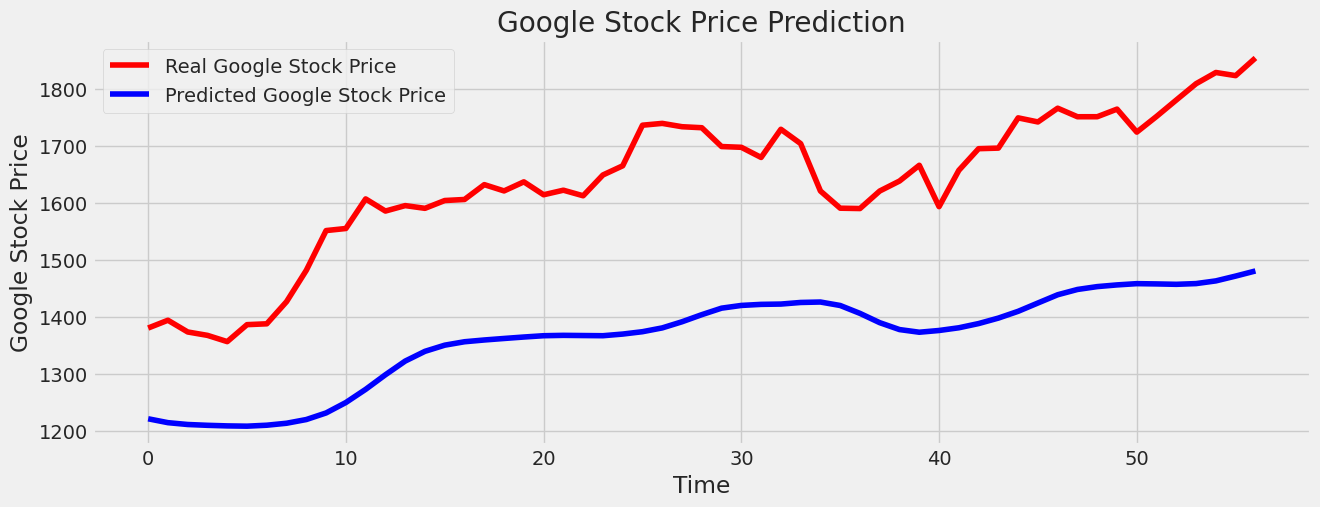

In [164]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [165]:
regressor = Sequential()

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 11)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [166]:
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 60, 60)            17280     
                                                                 
 dropout_24 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_25 (LSTM)              (None, 60, 60)            29040     
                                                                 
 dropout_25 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_26 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_26 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_27 (LSTM)              (None, 120)              

In [181]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])
MODEL = regressor.fit(X_train, y_train,validation_data=(X_test1, y_test1), epochs=50, batch_size=32)

Epoch 1/50
34/34 [==============================] - 14s 207ms/step - loss: 0.0026 - accuracy: 9.1996e-04 - val_loss: 3579862581248.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
34/34 [==============================] - 8s 235ms/step - loss: 0.0018 - accuracy: 9.1996e-04 - val_loss: 3579863105536.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
34/34 [==============================] - 6s 184ms/step - loss: 0.0018 - accuracy: 9.1996e-04 - val_loss: 3579863105536.0000 - val_accuracy: 0.0000e+00
Epoch 4/50
34/34 [==============================] - 8s 223ms/step - loss: 0.0020 - accuracy: 9.1996e-04 - val_loss: 3579862581248.0000 - val_accuracy: 0.0000e+00
Epoch 5/50
34/34 [==============================] - 7s 193ms/step - loss: 0.0021 - accuracy: 9.1996e-04 - val_loss: 3579863105536.0000 - val_accuracy: 0.0000e+00
Epoch 6/50
34/34 [==============================] - 7s 215ms/step - loss: 0.0022 - accuracy: 9.1996e-04 - val_loss: 3579862843392.0000 - val_accuracy: 0.0000e+00
Epoch 7/50
34/34 [=========

In [186]:
y_pred1 = regressor.predict(X_test1)

2/2 [==============================] - 1s 44ms/step


In [187]:
y_pred11 = y_pred1*scale
y_test11 = y_test1*scale

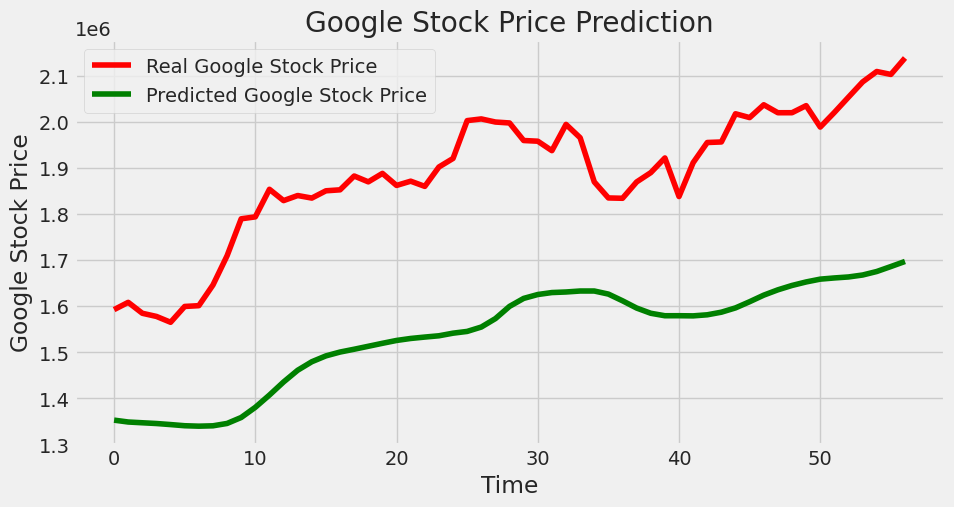

In [183]:
plt.figure(figsize=(10,5))
plt.plot(y_test11, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred11, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

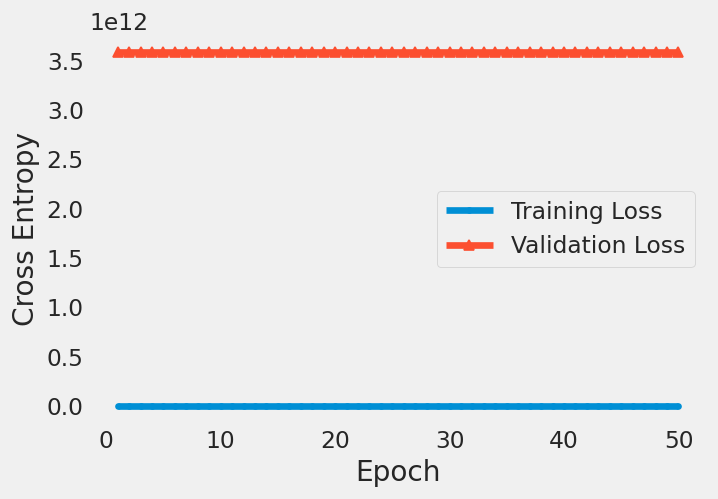

In [189]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()

    plt.show()

plot_training_curves(pd.DataFrame(MODEL.history))

In [171]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test,y_pred))

277.68248788553814

In [174]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test1,y_pred1))

307.38684031704224